In [1]:
import sys
sys.path.insert(0, './Libs/Training/')
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
import trainingUtils as TU
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
Xlearn = pd.read_csv("./Data/PreprocessingOutput/Xlearn.csv", header = 0).values
ylearn = pd.read_csv("./Data/PreprocessingOutput/ylearn.csv", header = 0).values
tscv = TimeSeriesSplit(n_splits = 3)

In [3]:
TU._decisionTreeGridSearch(Xlearn, ylearn, tscv)

Best score: -1.0409022057698751 using {'max_depth': 12, 'max_leaf_nodes': 100, 'min_samples_split': 5, 'splitter': 'best'}


In [4]:
def decisionTreeTrain(Xlearn, ylearn, tscv):
    performance = pd.DataFrame(columns=["Train Index", "MAE train", "MSE train", 
        "R2 train", "MAE test", "MSE test", "R2 test"])
    for trainIndex, Xtrain, ytrain, Xtest, ytest in TU._getTrainingData(Xlearn, ylearn, tscv):
        model, polymodel = TU._decisionTreeTrain(Xtrain, ytrain)
        maeTrain, mseTrain, r2Train = TU._performance(ytrain, model.predict(polymodel.transform(Xtrain)))
        maeTest, mseTest, r2Test = TU._performance(ytest, model.predict(polymodel.transform(Xtest)))
        performance.loc[len(performance)] = [trainIndex, maeTrain, mseTrain, r2Train, maeTest, mseTest, r2Test]
    return performance

result = decisionTreeTrain(Xlearn, ylearn, tscv.split(Xlearn))
print(result)

   Train Index  MAE train  MSE train  R2 train  MAE test  MSE test   R2 test
0       1749.0   0.015749   0.000471  0.330488  0.025733  0.001298 -1.428634
1       3499.0   0.016741   0.000505  0.184200  0.014528  0.000479 -0.265034
2       5249.0   0.015284   0.000446  0.172750  0.014759  0.000494 -0.370907


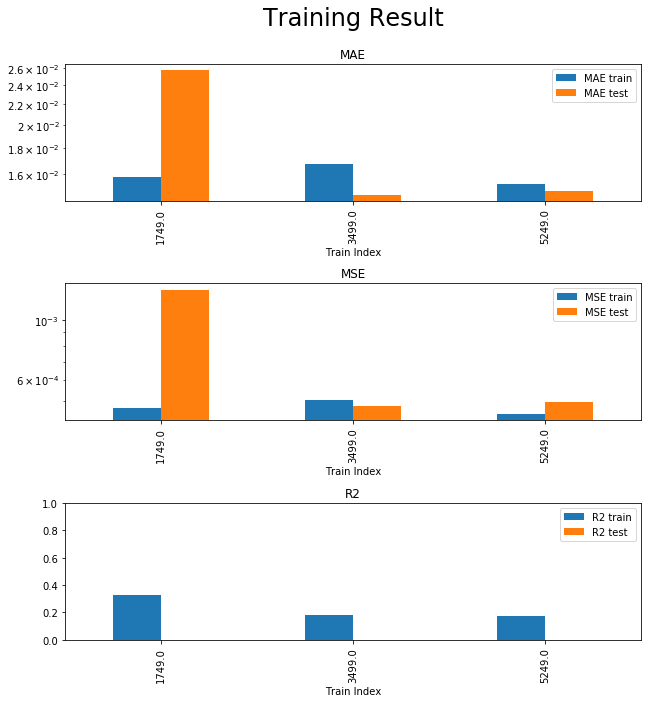

In [5]:
TU._plotTrainResult(result)

maeTest = 0.024551893854287257, mseTest = 0.002628879999402413, r2Test = -11.519768319003415


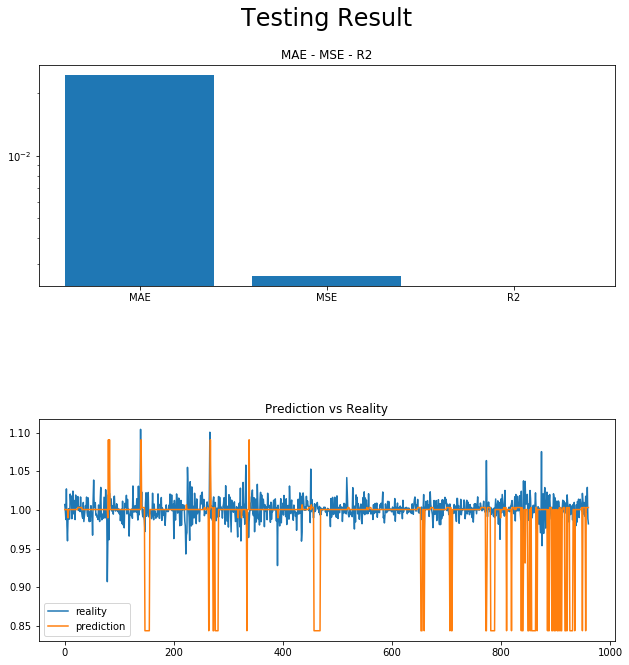

In [6]:
Xtest = pd.read_csv("./Data/PreprocessingOutput/Xtest.csv", header = 0).values
ytest = pd.read_csv("./Data/PreprocessingOutput/ytest.csv", header = 0).values

model, polymodel = TU._decisionTreeTrain(Xlearn, ylearn)
maeTest, mseTest, r2Test, ypredict = TU._predictModel(Xtest, ytest, model, polymodel)
print(f"maeTest = {maeTest}, mseTest = {mseTest}, r2Test = {r2Test}")

axes = TU._plotTestResult(maeTest, mseTest, r2Test, ytest, ypredict)